In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
df = pd.read_csv('imigrantes_canada.csv')
df.head()

In [ ]:
df.set_index('País', inplace=True)

In [ ]:
anos = list(map(str, range(1980, 2014)))

In [ ]:
Brasil = df.loc['Brasil', anos]

In [114]:
Brasil_dict = {'Ano' : Brasil.index.to_list(),
               'Imigrantes' : Brasil.values.tolist()}
dados_brasil = pd.DataFrame(Brasil_dict) #DATAFRAME

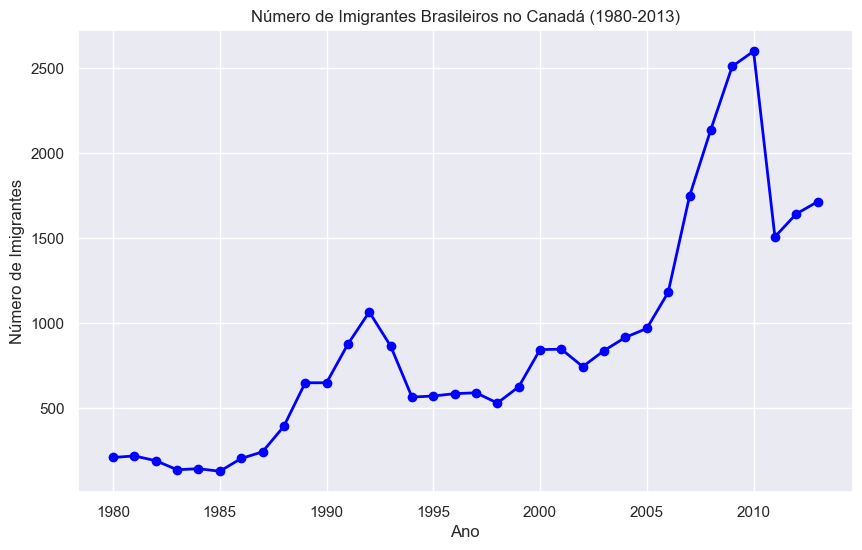

In [115]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(dados_brasil['Ano'], dados_brasil['Imigrantes'], marker='o', color='blue', linewidth=2)
ax.set_title('Número de Imigrantes Brasileiros no Canadá (1980-2013)')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
axs[0].plot(dados_brasil['Ano'], dados_brasil['Imigrantes'], marker='o', color='blue', linewidth=2)
axs[0].set_title('Número de Imigrantes Brasileiros no Canadá (1980-2013)')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de Imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil['Imigrantes'], vert=True)
axs[1].set_title('Distribuição dos Imigrantes Brasileiros (1980-2013)')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de Imigrantes')
axs[1].grid()
plt.show()

In [ ]:
dados_brasil.describe()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(dados_brasil, x='Ano', y='Imigrantes', 
              title='Número de Imigrantes Brasileiros no Canadá (1980-2013)',
              markers=True)
fig.add_scatter(x=dados_brasil['Ano'], y=dados_brasil['Imigrantes'], mode='lines+markers', name='Brasileiros')
fig.update_traces(line=dict(color='blue', width=2))
fig.update_layout(xaxis_title='Ano', yaxis_title='Número de Imigrantes')
fig.update_xaxes(tickmode='linear')
fig.show()

In [ ]:
Argentina = df.loc['Argentina', anos]
Argentina_dict = {'Ano' : Argentina.index.to_list(),
                  'Imigrantes' : Argentina.values.tolist()}
dados_argentina = pd.DataFrame(Argentina_dict)

In [ ]:
fig = px.line(dados_brasil, x='Ano', y='Imigrantes', 
              title='Número de Imigrantes Brasileiros e Argentinos no Canadá (1980-2013)',
              markers=True)
fig.add_scatter(x=dados_brasil['Ano'], y=dados_brasil['Imigrantes'], mode='lines+markers', name='Brasileiros')
fig.add_scatter(x=dados_argentina['Ano'], y=dados_argentina['Imigrantes'], mode='lines+markers', name='Argentinos')
fig.update_traces(marker=dict(size=8))
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='Imigrantes')
fig.show()

In [ ]:
dados_argentina.describe()

In [ ]:
import plotly.graph_objs as go

# Criando uma figura
fig = go.Figure()

# Adicionando a linha com os dados do Brasil 
fig.add_trace(
    go.Scatter(x=[dados_brasil['Ano'].iloc[0]], y=[dados_brasil['Imigrantes'].iloc[0]], mode='lines', name='Imigrantes do Brasil', line=dict(width=4))
)

# Adicionando a linha com os dados da Argentina
fig.add_trace(
    go.Scatter(x=[dados_argentina['Ano'].iloc[0]], y=[dados_argentina['Imigrantes'].iloc[0]], mode='lines', name='Imigrantes da Argentina', line=dict(width=4))
)

# Definindo as configurações de layout
fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil e da Argentina para o Canadá no período de 1980 a 2013',
        x=0.1,

        font=dict(size=18)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de Imigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1200, # largura da figura em pixels
    height=600 # altura da figura em pixels
)

# Definindo as configurações de animação
frames = []
for i in range(len(dados_brasil)):
    frame_data = [
        go.Scatter(x=dados_brasil['Ano'].iloc[:i+1], y=dados_brasil['Imigrantes'].iloc[:i+1]),
        go.Scatter(x=dados_argentina['Ano'].iloc[:i+1], y=dados_argentina['Imigrantes'].iloc[:i+1])
    ]
    frame = go.Frame(data=frame_data)
    frames.append(frame)
fig.frames = frames

# Mostrando a figura
fig.show()

In [ ]:
Peru = df.loc['Peru', anos]
Peru_dict = {'Ano' : Peru.index.to_list(),
                'Imigrantes' : Peru.values.tolist()}
dados_peru = pd.DataFrame(Peru_dict)


Colômbia = df.loc['Colômbia', anos]
Colômbia_dict = {'Ano' : Colômbia.index.to_list(),
                  'Imigrantes' : Colômbia.values.tolist()}
dados_colombia = pd.DataFrame(Colômbia_dict)

In [ ]:
#método com um dataframe para cada país
fig = px.line(dados_brasil, x='Ano', y='Imigrantes', 
              title='Número de Imigrantes Brasileiros, Argentinos, Peruanos e Colombianos no Canadá (1980-2013)',
              markers=True)
fig.add_scatter(x=dados_brasil['Ano'], y=dados_brasil['Imigrantes'], mode='lines+markers', name='Brasileiros')
fig.add_scatter(x=dados_argentina['Ano'], y=dados_argentina['Imigrantes'], mode='lines+markers', name='Argentinos')
fig.add_scatter(x=dados_peru['Ano'], y=dados_peru['Imigrantes'], mode='lines+markers', name='Peruanos')
fig.add_scatter(x=dados_colombia['Ano'], y=dados_colombia['Imigrantes'], mode='lines+markers', name='Colombianos')
fig.update_traces(marker=dict(size=8))
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='Imigrantes')
fig.show()

In [ ]:
paises = ['Brasil', 'Argentina', 'Peru', 'Colômbia', 'Chile', 'México']

cores = {
    'Brasil': 'green',
    'Argentina': 'blue',
    'Peru': 'orange',
    'Colômbia': 'red',
    'Chile': 'purple',
    'México': 'brown'
}

In [109]:
df_paises = pd.DataFrame()
for pais in paises:
    dados_pais = df.loc[pais, anos]
    df_paises[pais] = dados_pais.values
df_paises.index = anos
df_paises.index.name = 'Ano'
df_paises.head()
df_paises.describe()
fig = px.line(df_paises, x=df_paises.index, y=df_paises.columns,
              title='Número de Imigrantes de Países Latinos no Canadá (1980-2013)',
              markers=True,
              color_discrete_sequence=px.colors.qualitative.Set2) #posso usar color_discrete_map=cores para as cores personalizadas
fig.update_layout(width=900, height=500,
                  xaxis=dict(tickmode='linear', tick0=1980, dtick=5),
                  yaxis=dict(title='N° Imigrantes'),
                  legend_title_text='Países')
fig.update_traces(marker=dict(size=8))
fig.update_layout(title_x=0.5)
fig.show()

In [118]:
df_paises = pd.DataFrame()
for pais in paises:
    dados_pais = df.loc[pais, anos]
    df_paises[pais] = dados_pais.values
df_paises.index = anos
df_paises.index.name = 'Ano'

fig =go.Figure()
fig.add_trace(go.Scatter(x=))

# Filtrar apenas de 1980 a 2000
df_paises_filtrado = df_paises.loc['1980':'2000']


fig = px.line(df_paises_filtrado, x=df_paises_filtrado.index, y=df_paises_filtrado.columns,
              title='Número de Imigrantes de Países Latinos no Canadá (1980-2000)',
              markers=True)
fig.update_traces(marker=dict(size=8))
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='N° Imigrantes')
fig.show()

SyntaxError: expected argument value expression (2240292838.py, line 9)

In [ ]:
# Transformar para formato longo (formato vertical "ANO - PAÍS - IMIGRANTES")
df_longo = df_paises.reset_index().melt(id_vars='Ano', var_name='País', value_name='Imigrantes')

'''
Filtro com anos especificos, não vai até 2014, apenas até 2000

Argentina# Filtrar apenas de 1980 a 2000
df_paises_filtrado = df_paises.loc['1980':'2000']


fig = px.line(df_paises_filtrado, x=df_paises_filtrado.index, y=df_paises_filtrado.columns,
              title='Número de Imigrantes de Países Latinos no Canadá (1980-2000)',
              markers=True)
'''
# Criar gráfico de barras
fig = px.bar(df_longo, x='Ano', y='Imigrantes', color='País',
             title='Número de Imigrantes de Países Latinos no Canadá (1980-2000)',
             barmode='group',
             color_discrete_map=cores)
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='N° Imigrantes')


fig.show()

In [ ]:
# Gráfico de barras do total de imigrantes por país (1980-2013)
imigracao_total_paises = df_paises.sum().sort_values(ascending=True)

imigracao_total_paises.plot(kind='bar', color=[cores[pais] for pais in imigracao_total_paises.index],
                             title='Total de Imigrantes Latinos no Canadá (1980-2013)',
                             figsize=(10,6))
for index, value in enumerate(imigracao_total_paises):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

In [ ]:
#--------------------------------------------------------------------------------------------------------------#
#SEABORN

In [ ]:
import seaborn as sns
sns.set_theme()

In [ ]:
def gerar_grafico_paleta(palette):
    top_10 = df.sort_values('Total', ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total', palette=palette, orient='h')
    ax.set(title='Top 10 Países de Origem dos Imigrantes para o Canadá (1980-2013)', xlabel='Total de Imigrantes', ylabel='País')
    ax.set_xlabel('Total de Imigrantes', fontsize=12)
    ax.set_ylabel('', fontsize=12)
    plt.show()

In [ ]:
gerar_grafico_paleta('rocket')